## Importando os módulos

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from linear_regression import *
from z_score import *

## Preparando os dados

In [30]:
data = pd.read_csv('../artificial1d.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

### Normalizando

In [31]:
zs = ZScore()
X = zs.fit_transform(X)


In [32]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

## Treinando o modelo

In [33]:
linreg = LinearRegression()
linreg.fit_gd(X, y, num_epochs=10000)

## Resultados

### MSE

In [34]:
mse = linreg.get_mse(X, y)
print(f'MSE = {mse[0]}')

MSE = 0.21340090132936984


### Parâmetros

In [35]:
w = linreg.get_params()
print(f'Parâmetros = {w}')

Parâmetros = [[0.06761792]
 [0.95615043]]


### Plot da curva

#### Desnormalizando o X

#### Plot

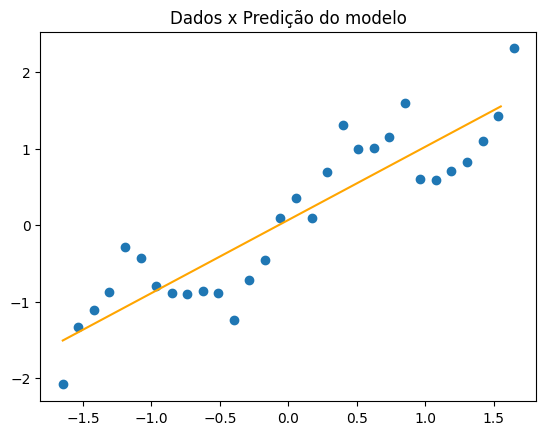

In [36]:
rng = np.arange(min(X[:, 1]), max(X[:, 1]), 0.1)
rng = rng.reshape(-1, 1)

rng_ones = np.hstack((np.ones((rng.shape[0], 1)), rng))

plt.title('Dados x Predição do modelo')
plt.scatter(X[:, 1], y)
plt.plot(rng, linreg.pred(rng_ones), c='orange')
plt.show()